# CarSeats Dataset

In [436]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split
sns.set()

In [437]:
FILE_PATH = 'Dataset/Carseats.csv'

In [438]:
df=pd.read_csv(FILE_PATH)
df.drop('Unnamed: 0', axis=1, inplace=True)
# Replace Yes/No with True/False
df.replace({'Yes': True, 'No': False}, inplace=True)
df.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,True,True
1,11.22,111,48,16,260,83,Good,65,10,True,True
2,10.06,113,35,10,269,80,Medium,59,12,True,True
3,7.40,117,100,4,466,97,Medium,55,14,True,True
4,4.15,141,64,3,340,128,Bad,38,13,True,False
5,10.81,124,113,13,501,72,Bad,78,16,False,True
6,6.63,115,105,0,45,108,Medium,71,15,True,False
7,11.85,136,81,15,425,120,Good,67,10,True,True
8,6.54,132,110,0,108,124,Medium,76,10,False,False
9,4.69,132,113,0,131,124,Medium,76,17,False,True


In [439]:
print("Shape ",df.shape)
print("Columns ",df.columns)

Shape  (400, 11)
Columns  Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')


The CarSeats dataframe consists of 400 reecords. Each record consists of following column

In [440]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    bool   
 10  US           400 non-null    bool   
dtypes: bool(2), float64(1), int64(7), object(1)
memory usage: 29.0+ KB
None


In [441]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


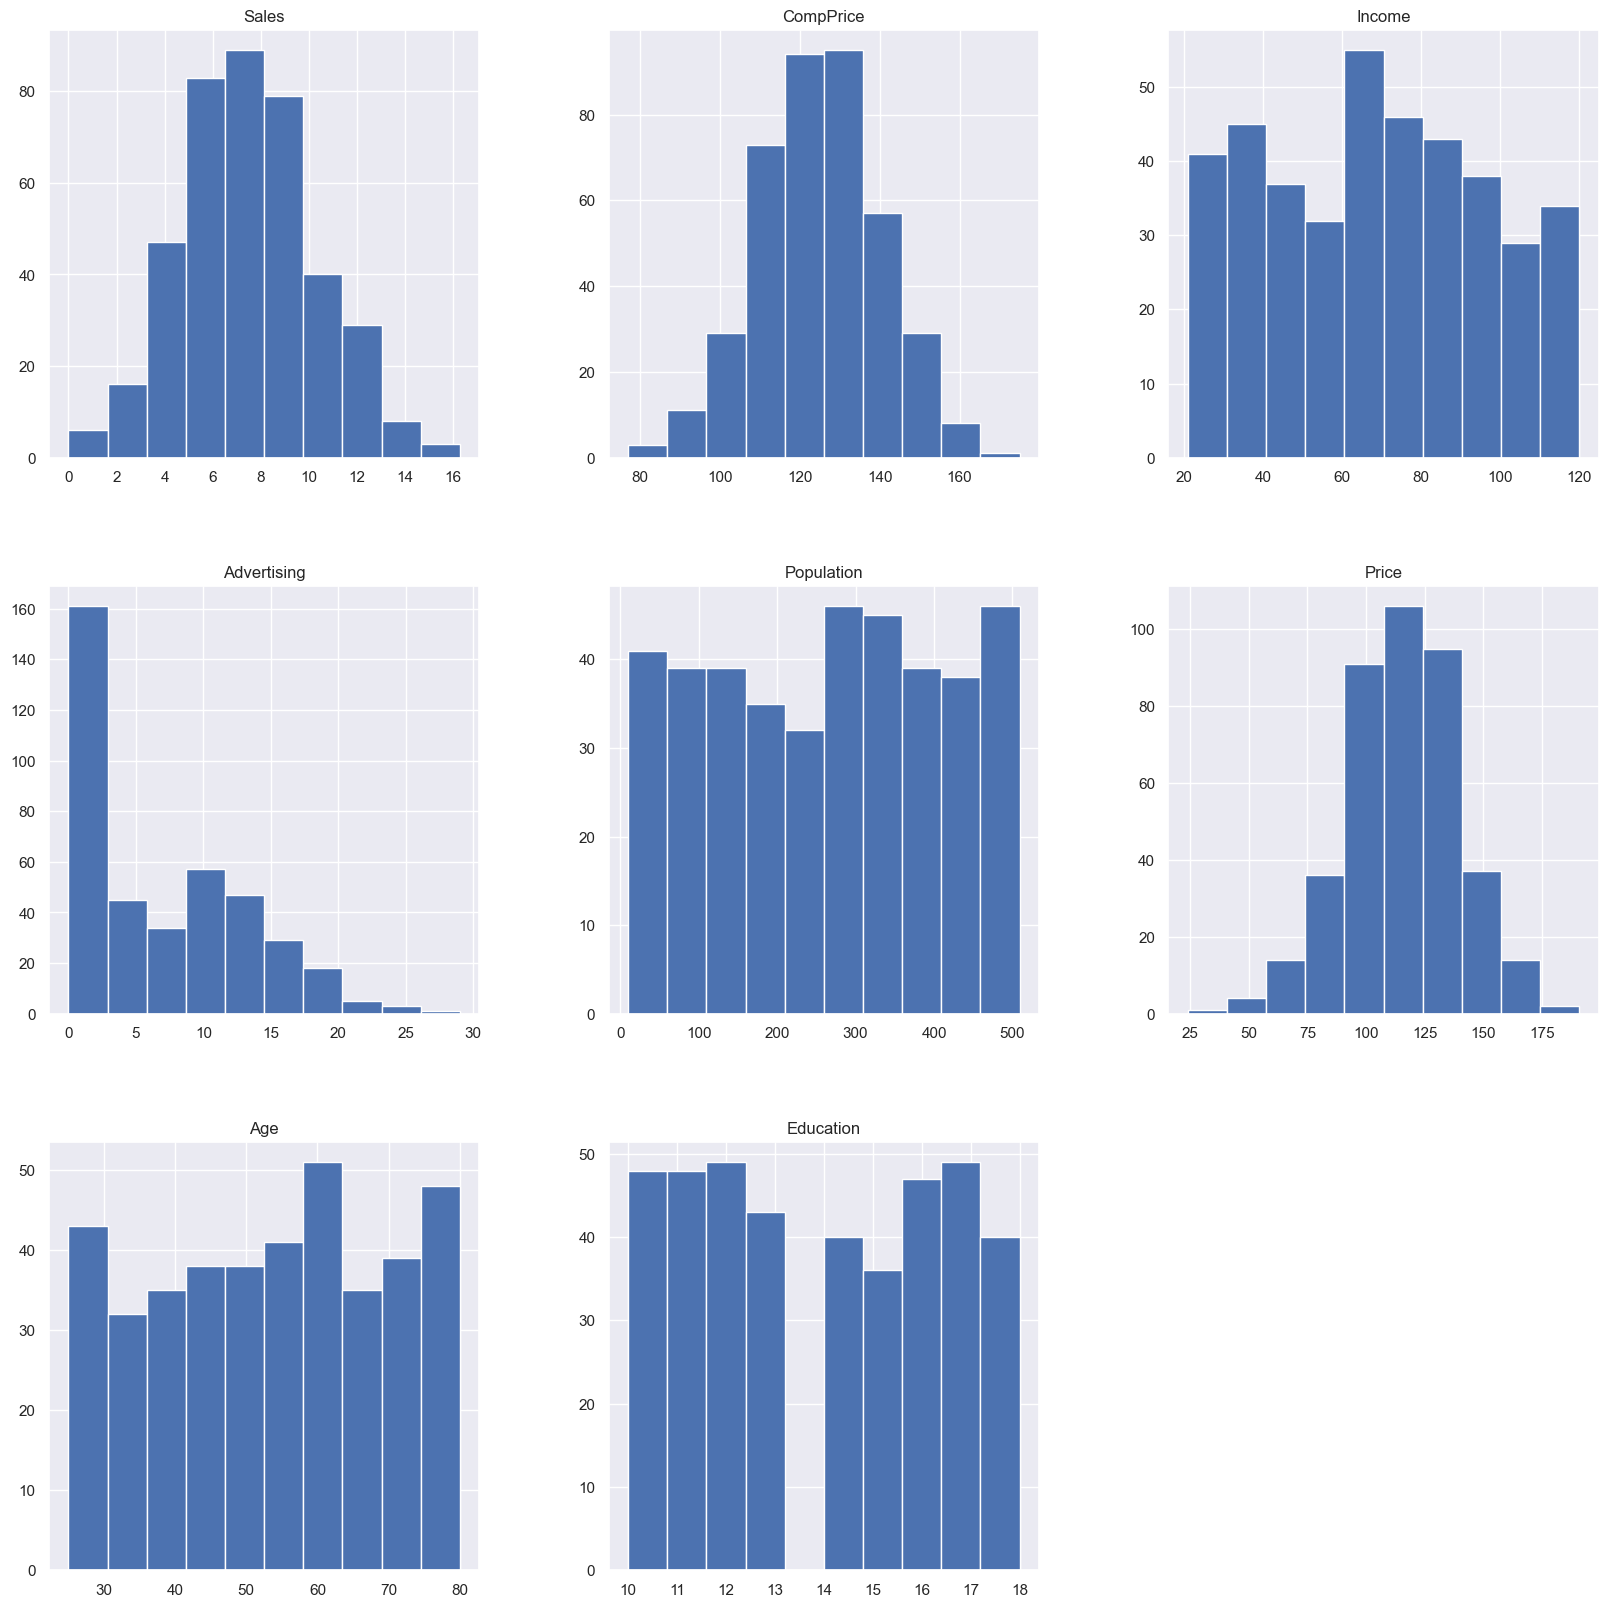

In [442]:
df.hist(figsize=(20,20))
plt.show()

In [443]:
df.describe(include=["object", "bool"])

,ShelveLoc,Urban,US
count,400,400,400
unique,3,2,2
top,Medium,True,True
freq,219,282,258


In [444]:
print(df["ShelveLoc"].value_counts())
print(df["Urban"].value_counts())
print(df["US"].value_counts())

ShelveLoc
Medium    219
Bad        96
Good       85
Name: count, dtype: int64
Urban
True     282
False    118
Name: count, dtype: int64
US
True     258
False    142
Name: count, dtype: int64


In [445]:
# Convert ShelveLoc 0,1,2 to Bad, Medium, Good
df["ShelveLoc"].replace({"Bad": 0, "Medium": 1, "Good": 2}, inplace=True)
df.replace({True: 1, False: 0}, inplace=True)
print(df["ShelveLoc"].value_counts())

ShelveLoc
1    219
0     96
2     85
Name: count, dtype: int64


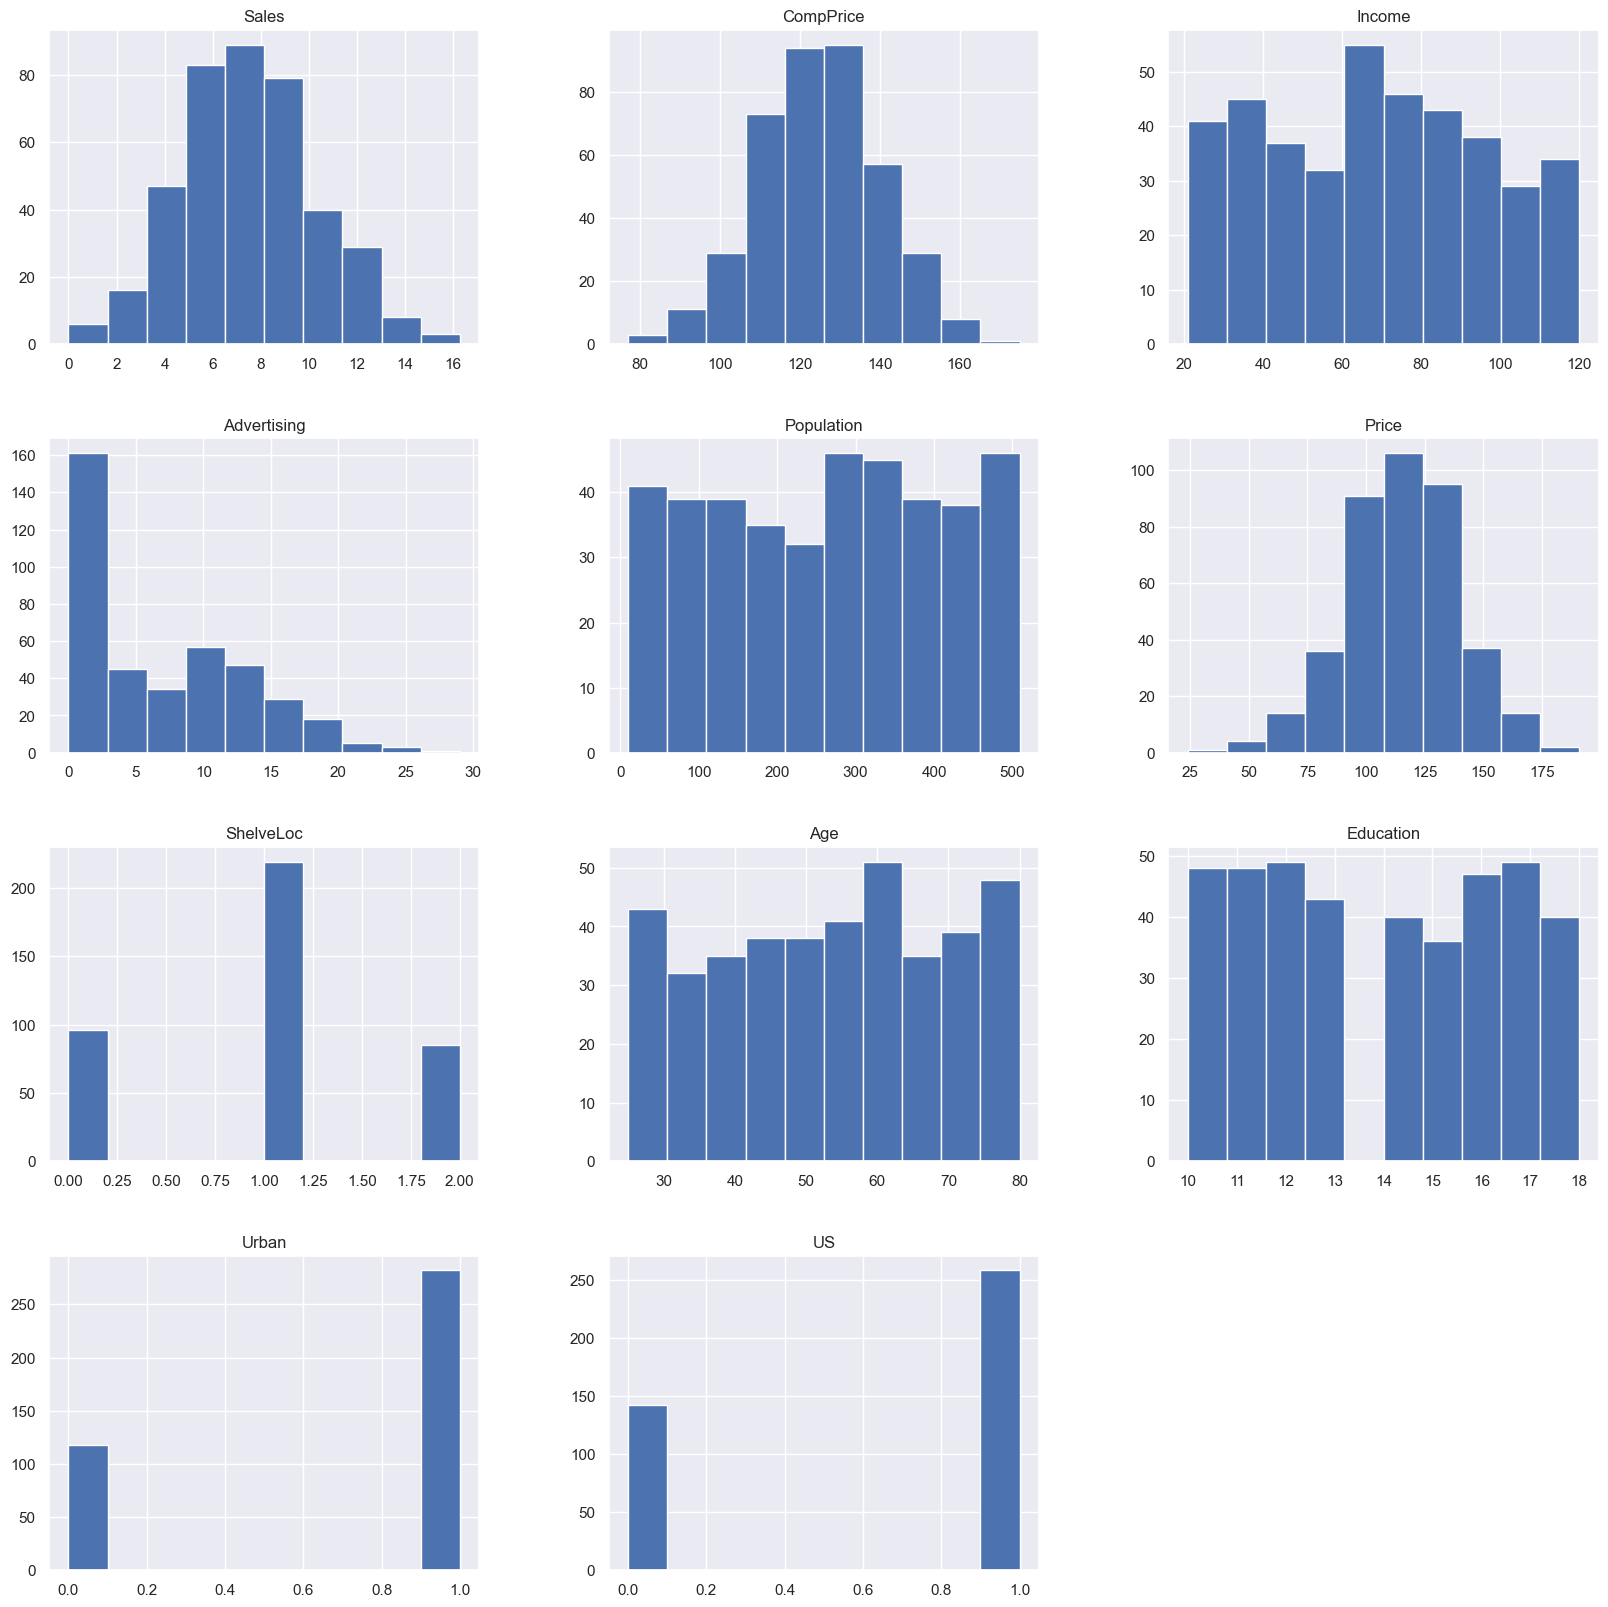

In [446]:
df.hist(figsize=(20,20))
plt.show()

In [447]:
correlations = df.corr()
correlations

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,0.554458,-0.231815,-0.051955,-0.015419,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.038549,-0.100239,0.025197,0.066594,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.053465,-0.004670,-0.056855,0.037967,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,0.056552,-0.004557,-0.033594,0.042035,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.020614,-0.042663,-0.106378,-0.052025,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.050924,-0.102177,0.011747,0.047016,0.057861
ShelveLoc,0.554458,0.038549,-0.053465,0.056552,-0.020614,0.050924,1.000000,0.014149,-0.025723,-0.075404,0.047378
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.014149,1.000000,0.006488,0.028479,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,-0.025723,0.006488,1.000000,-0.033094,-0.078250
Urban,-0.015419,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.075404,0.028479,-0.033094,1.000000,0.047085


<Axes: >

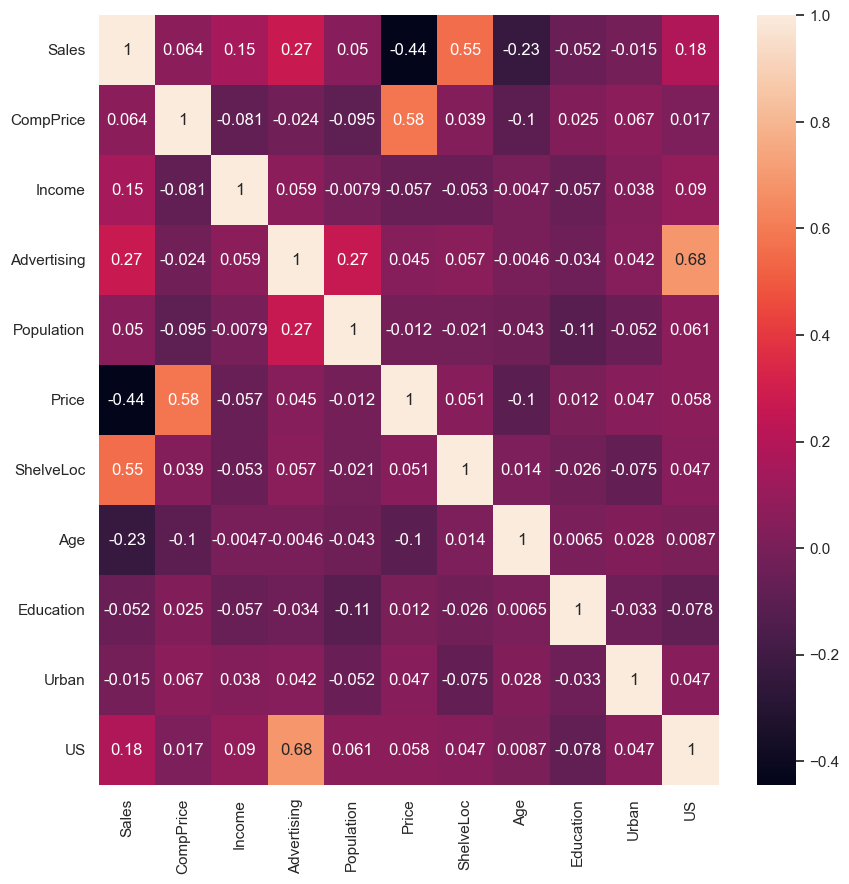

In [448]:

plt.figure(figsize=(10,10))
sns.heatmap(correlations, annot=True)


# Training Test Split

In [449]:
y=df['Sales']
X = df.drop(['Sales'],axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [450]:
X_train.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
3,117,100,4,466,97,1,55,14,1,1
18,110,110,0,408,68,2,46,17,0,1
202,121,78,4,413,130,0,46,10,0,1
250,137,105,10,435,156,2,72,14,1,1
274,135,93,2,67,119,1,34,11,1,1


## Linear Regression Model

In [451]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [452]:
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [453]:
from sklearn.metrics import r2_score,mean_squared_error


def print_losses(y_train, y_train_pred, y_test, y_pred):
    print("Train Loss:")
    loss = mean_squared_error(y_train, y_train_pred)
    r2Score = r2_score(y_train, y_train_pred)
    print("Loss:", loss, "R2 Score:", r2Score)

    print("Test Loss:")
    loss = mean_squared_error(y_test, y_pred)
    r2Score = r2_score(y_test, y_pred)
    print("Loss:", loss, "R2 Score:", r2Score)

print_losses(y_train, y_train_pred, y_test, y_pred)

Train Loss:
Loss: 1.0303591808881292 R2 Score: 0.8609893714143794
Test Loss:
Loss: 1.2140407850121935 R2 Score: 0.8773225601508227


## Linear regression on features scaled model

In [454]:
# Scaling Features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [455]:
scaled_feature_model = LinearRegression()

scaled_feature_model.fit(X_train_scaled,y_train)

y_pred = scaled_feature_model.predict(X_test_scaled)

y_train_pred = scaled_feature_model.predict(X_train_scaled)

print_losses(y_train, y_train_pred, y_test, y_pred)

Train Loss:
Loss: 1.0303591808881292 R2 Score: 0.8609893714143794
Test Loss:
Loss: 1.214040785012195 R2 Score: 0.8773225601508226


There is no changes in statistics. So feature scaling is not required.

## Lasso Regression at different lambda

In [456]:
from sklearn.linear_model import Lasso

lambdas = [i/100 for i in range(0, 10)] + [i/10 for i in range(1, 10)] + [i for i in range(1, 10)]
test_r2 = []
train_r2 = []
weights = []
intercepts = []
models = []

for l in lambdas:
    lasso_model = Lasso(alpha=l)
    lasso_model.fit(X_train, y_train)
    y_train_pred_lasso = lasso_model.predict(X_train)
    y_pred_lasso = lasso_model.predict(X_test)
    train_r2.append(r2_score(y_train, y_train_pred_lasso))
    test_r2.append(r2_score(y_test, y_pred_lasso))
    weights.append(lasso_model.coef_)
    intercepts.append(lasso_model.intercept_)
    models.append(lasso_model)


f:\projects\MA515\MA515_FDS_Project\.venv\Lib\site-packages\sklearn\base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
f:\projects\MA515\MA515_FDS_Project\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
f:\projects\MA515\MA515_FDS_Project\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.649e+02, tolerance: 2.372e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridg

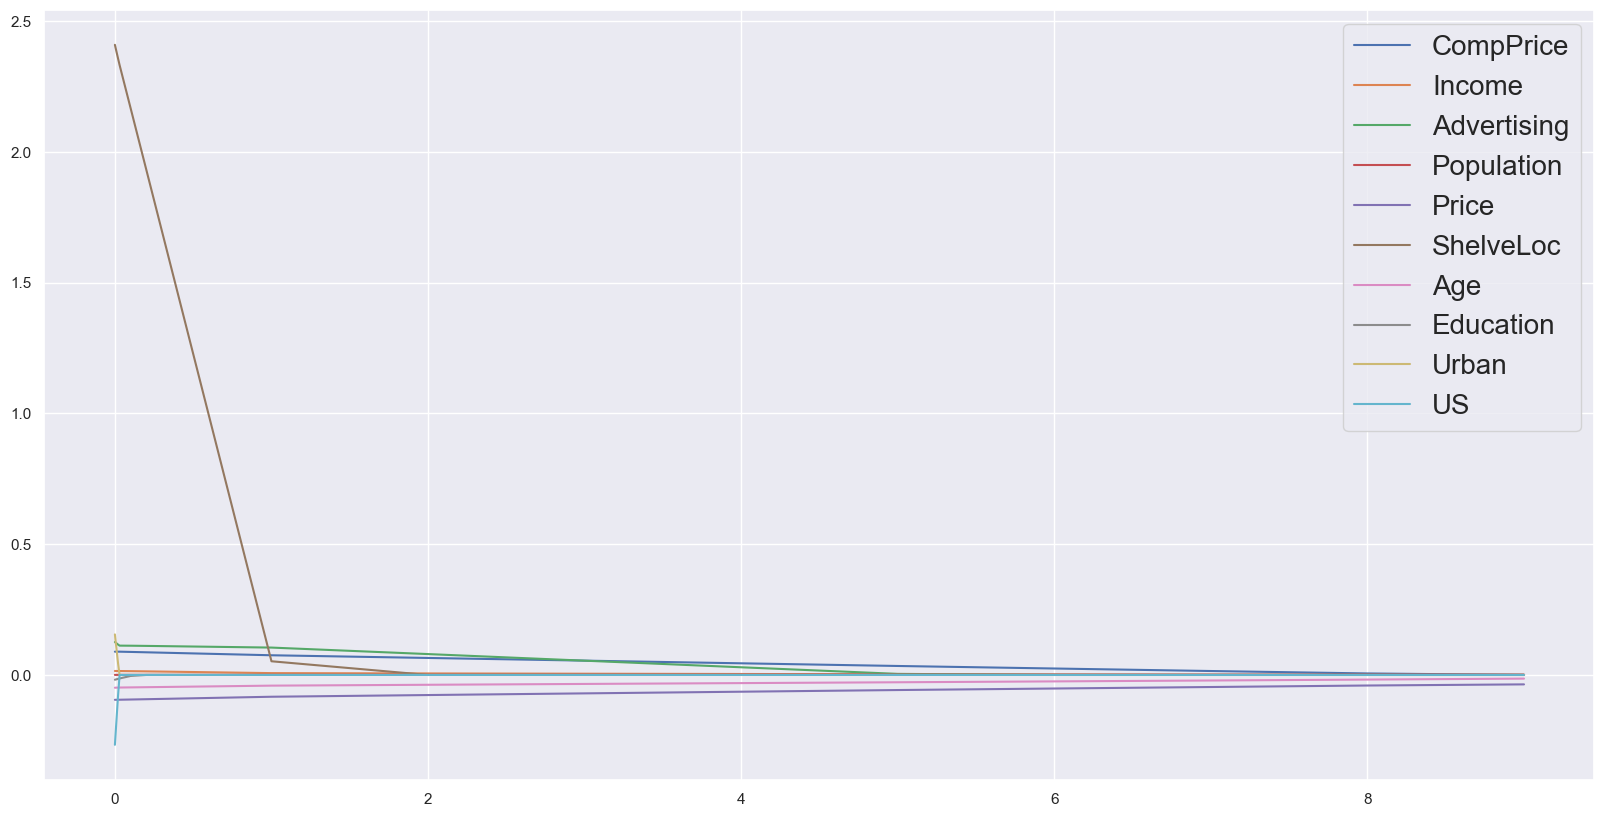

In [471]:
# Plotting weights vs lambda

weights = np.array(weights)
plt.figure(figsize=(20, 10))
plt.plot(lambdas, weights[:, 0], label="CompPrice")
plt.plot(lambdas, weights[:, 1], label="Income")
plt.plot(lambdas, weights[:, 2], label="Advertising")
plt.plot(lambdas, weights[:, 3], label="Population")
plt.plot(lambdas, weights[:, 4], label="Price")
plt.plot(lambdas, weights[:, 5], label="ShelveLoc")
plt.plot(lambdas, weights[:, 6], label="Age")
plt.plot(lambdas, weights[:, 7], label="Education")
plt.plot(lambdas, weights[:, 8], label="Urban")
plt.plot(lambdas, weights[:, 9], label="US")
plt.legend(fontsize="20")
plt.show()


In [458]:
# Summary of different models. Equations, R2 Scores

print("Equations:")

for i in range(len(models)):
    print("Lambda:", lambdas[i])
    print("y = ", intercepts[i], end=" ")
    for j in range(len(weights[i])):
        print("+ (", weights[i][j], "*", X.columns[j], ")", end=" ")
    print()
    print("Training R2 Score:", train_r2[i], "; Testing R2 Score: ", test_r2[i])
    print()


Equations:
Lambda: 0.0
y =  5.984368009092092 + ( 0.08905653907812541 * CompPrice ) + ( 0.01522359781971538 * Income ) + ( 0.1258577071620246 * Advertising ) + ( 0.00030070391262935917 * Population ) + ( -0.09501934502484026 * Price ) + ( 2.4092363921948206 * ShelveLoc ) + ( -0.048756637083196434 * Age ) + ( -0.01822651811677276 * Education ) + ( 0.15509983201674526 * Urban ) + ( -0.2670284507441404 * US ) 
Training R2 Score: 0.8609893714143794 ; Testing R2 Score:  0.877322560150823

Lambda: 0.01
y =  5.967506565810167 + ( 0.08906180938282332 * CompPrice ) + ( 0.015170797931702661 * Income ) + ( 0.1210512782148847 * Advertising ) + ( 0.0003292064607395181 * Population ) + ( -0.09491394563988839 * Price ) + ( 2.383215760421135 * ShelveLoc ) + ( -0.048513817589735234 * Age ) + ( -0.0166154149778448 * Education ) + ( 0.10011848180925575 * Urban ) + ( -0.17348655866119542 * US ) 
Training R2 Score: 0.8607446753693663 ; Testing R2 Score:  0.8787896330873396

Lambda: 0.02
y =  5.950658248503

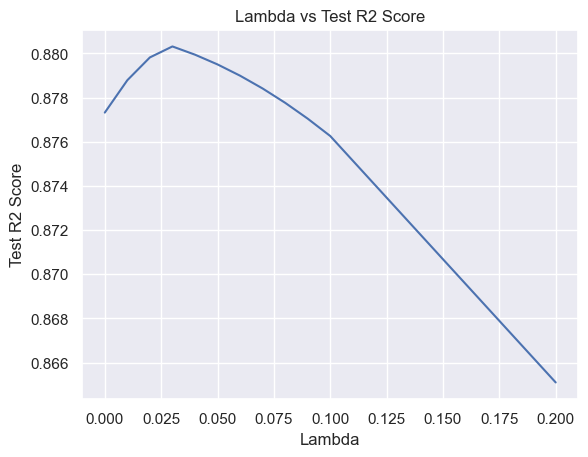

In [459]:
# Plotting R2 Score vs Lambda

plt.plot(lambdas[:12], test_r2[:12])
plt.xlabel('Lambda')
plt.ylabel('Test R2 Score')
plt.title('Lambda vs Test R2 Score')
plt.show()


So, lambda = 0.03 is best lambda with R^2 score = 0.8803189161152304 

In [460]:
y=df['Sales']
X = df.drop(['Sales'],axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [470]:
print('[',end = '')
print(*lambdas, sep = ", ", end = ']')

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9]

## PCA

In [461]:
# import pca from sklearn

# scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Original shape: {}".format(str(X_train.shape)))
print("Reduced shape: {}".format(str(X_train_pca.shape)))

Original shape: (320, 10)
Reduced shape: (320, 10)


In [462]:
regression_model = LinearRegression()

regression_model.fit(X_train_pca, y_train)

LinearRegression()

In [463]:
regression_model.score(X_test_pca, y_test)

0.8773225601508226